In [64]:
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import ast
import squarify

import re

In [6]:
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [10]:
stop = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer() 

In [12]:
df = pd.read_csv("summary.csv")

In [13]:
df

,Unnamed: 0,Year,Content,One line,Five lines
0,0,1934,Origin,Origin,Origin
1,1,1935,Joining the fold...\nAn alcoholic from New Yor...,['Forging friendships in Akron\nBill joins the...,['Bill and Lois join the Oxford Group\nFollowi...
2,2,1936,An offer spurs “group conscience”\nCharles B. ...,['At the Clinton Street meeting that very even...,An offer spurs “group conscience”\nCharles B. ...
3,3,1937,The office that will go down in A.A. history\n...,['Action in Akron\nOxford Group meetings for a...,"['Plans for the future\nIn late 1937, Bill pay..."
4,4,1938,"Rockefeller’s stance\nFrank Amos (right), who ...",['The Alcoholic Foundation\nFrank Amos and oth...,"['Rockefeller’s stance\nFrank Amos (right), wh..."
...,...,...,...,...,...
74,74,2013,French Big Book Celebrates 50 Years\nMarch 201...,[French Big Book Celebrates 50 Years\nMarch 20...,French Big Book Celebrates 50 Years\nMarch 201...
75,75,2014,"Happy Anniversary, Quebec!\nSeventy years ago,...",['Big Book Turns 75\nApril 2014 marks the 75th...,"['Happy Anniversary, Quebec!', 'Seventy years ..."
76,76,2015,Japan celebrates the 40th Anniversary\nIn Febr...,"['At the Sunday morning meeting, the 35 millio...","['A.A.’s 80th Birthday celebrated in Atlanta, ..."
77,77,2016,"A.A. in Addis Ababa, Ethiopia\nThe first Amhar...",['Release of “A New Freedom”\nFilmed inside co...,"['A.A. in Addis Ababa, Ethiopia\nThe first Amh..."


In [118]:
temp = {}
# snow = nltk.stem.SnowballStemmer('english')
our_stop = stop.union({'alcoholic', 'anonymous', 'meeting', 'group', 'member'})
for index, row in df.iterrows():
    sentence = row['Content']
    try:
        sentence = " ".join(eval(row['Five lines']))
    except Exception as e:
        sentence = row['Five lines']
        print(e)
        
    year = int(row['Year'])
    sentence = sentence.lower()                 # Converting to lowercase
    cleanr = re.compile('<.*?>')
    sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
    sentence = re.sub(r'[?|!|\'|"|#\’—“”’]\\n',r'',sentence)
    sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations
    words = [word.strip() for word in sentence.split()]
    words = [word.strip() for word in words]   # Stemming and removing stopwords
    words = [i for i in words if len(i)>1 and i not in our_stop]
    temp[year] = words

name 'Origin' is not defined
invalid syntax (<string>, line 1)
invalid syntax (<string>, line 1)
invalid syntax (<string>, line 1)


In [106]:
def get_sentiment(sentence):
    sid = SentimentIntensityAnalyzer()
#     print(sentence)
    ss = sid.polarity_scores(sentence)
#     for k in sorted(ss):
#         print('{0}: {1}\n'.format(k, ss[k]), end='')
    return ss

In [107]:
get_sentiment(" ".join(temp[1935]))

{'neg': 0.044, 'neu': 0.755, 'pos': 0.201, 'compound': 0.997}

In [108]:
year_sets = [(1935, 1944), (1945, 1954), (1955, 1964), (1965, 1974), (1975, 1984), (1985, 1994), (1995, 2004), (2005, 2017)]


In [122]:
sentiment_decade = {}
for index, year_set in enumerate(year_sets):
    start, end = year_set[0], year_set[1]
    annot = "{}-{}".format(start, end)
    text = []
    for year in range(start, end+1):
        if year in temp:
            text.extend(temp[year])
    pos = get_sentiment(" ".join(text))
    sentiment_decade[year_set] = pos
    
sentiment_year = {}
x_ticks = list(range(1935, 2018))
for year in x_ticks:
    try:
        pos = get_sentiment(" ".join(temp[year]))
    except Exception as e:
        pos = {'pos': np.nan, 'neg': np.nan, 'compound': np.nan}
        print(e)
        
    sentiment_year[year] = pos


1981
1982
1994
1998
1999


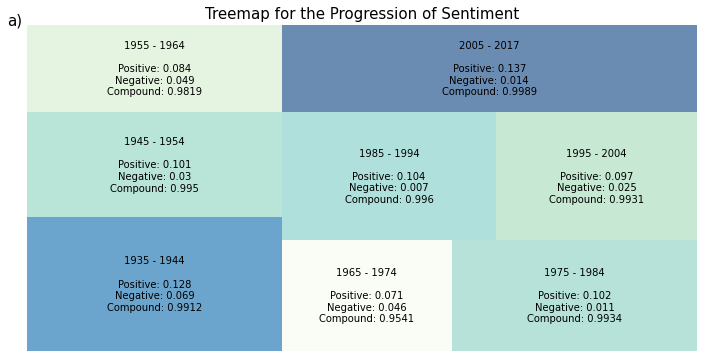

In [130]:
plt.close()
fig, ax = plt.subplots(figsize=(12,6))
cmap = plt.get_cmap('GnBu')
sizes = [sentiment_decade[year_set]['pos'] for year_set in year_sets]
label = ["{} - {}\n\nPositive: {}\nNegative: {}\nCompound: {}".format(year_set[0], year_set[1]
                            , sentiment_decade[year_set]['pos'], sentiment_decade[year_set]['neg'],sentiment_decade[year_set]['compound']
                                                                   ) for year_set in year_sets]
color= [cmap((i-min(sizes))/(max(sizes)-min(sizes))) for i in sizes]
squarify.plot(sizes=sizes, label=label, alpha=0.6, color=color )
ax.text(-0.03, 1.0, 'a)', transform=ax.transAxes, size=15,color='k')
plt.title("Treemap for the Progression of Sentiment", size=15)
plt.axis('off')
plt.savefig('images/decacde_sentiment.png',  dpi=800, bbox_inches='tight')
plt.show()

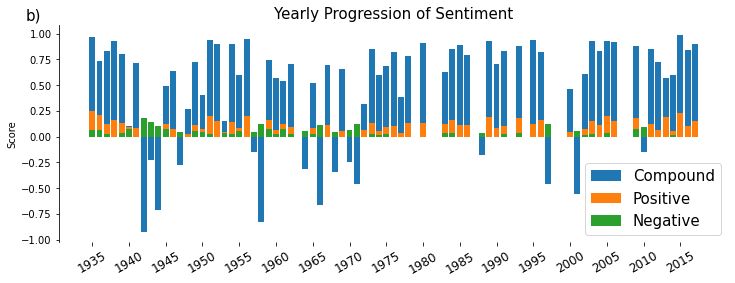

In [131]:

x = list(range(len(x_ticks)))
y1 = [sentiment_year[i]['pos'] for i in x_ticks]
y2 = [sentiment_year[i]['neg'] for i in x_ticks]
y3 = [sentiment_year[i]['compound'] for i in x_ticks]

plt.close()
gap = 5
fig, ax = plt.subplots(figsize=(12,4))

x = range(len(y3))
plt.bar(x, y3, label='Compound')
# plt.plot(x, y3, color='b')

x = range(len(y1))
plt.bar(x, y1,label='Positive')
# plt.plot(x, y1, color='g')

x = range(len(y2))
plt.bar(x, y2,  label='Negative')
# plt.plot(x, y2, color='r')



ax.text(-0.05, 1.02, 'b)', transform=ax.transAxes, size=15,color='k')

plt.xticks(x[::gap], x_ticks[::gap], rotation=30, size=12)
# ax.get_xaxis().set_visible(False)
# plt.xticks([])
ax.get_yaxis().get_major_formatter().set_scientific(False)
# ax.spines['bottom'].set_visible(False)

ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.ylabel('Score')
plt.title('Yearly Progression of Sentiment', size = 15)
plt.legend(loc='lower right', prop={'size': 15})
plt.savefig('images/sentiment.png', dpi=800, bbox_inches='tight')
plt.show()

In [69]:
sizes

[0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267, 0.267]